In [1]:
import numpy as np
import matplotlib.pyplot as plt
import umap
import umap.plot

import sys
sys.path.append('../')
from src.clusterability.dataset import Dataset
from src.clusterability.visualize import grid_around_points
from src.clusterability.visualize import average_inv_contours
from src.clusterability.visualize import show_inset_plot
from src.clusterability.visualize import show_side_plot

In [2]:
markov = Dataset('markov')
markov_contours = markov.representation('pitch_centered', limit=5000)
markov_mapper = umap.UMAP().fit(markov_contours)

In [3]:
binom = Dataset('markov')
binom_contours = binom.representation('pitch_centered', limit=5000)
binom_mapper = umap.UMAP().fit(binom_contours)

## Inset plot

### Markov inset plot

In [4]:
gridpoints, inside = grid_around_points(markov_mapper.embedding_, subdiv=8)
inv_contours = markov_mapper.inverse_transform(gridpoints)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


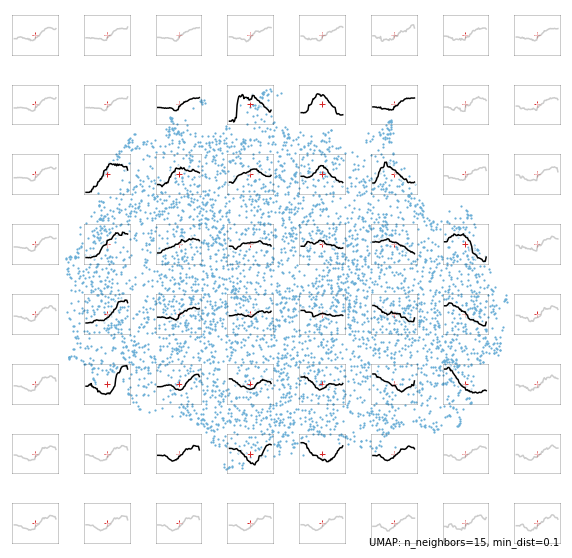

In [5]:
fig, ax = plt.subplots(1, figsize=(10,10))
show_inset_plot(markov_mapper, gridpoints, inside, inv_contours, inset_height=.7)

### Markov inset plot average inverse contours

In [6]:
# Average inverse contours
gridpoints, inside = grid_around_points(markov_mapper.embedding_, subdiv=8)
inv_contours = average_inv_contours(markov_mapper.inverse_transform, gridpoints, num_samples=25, eps=0.3)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


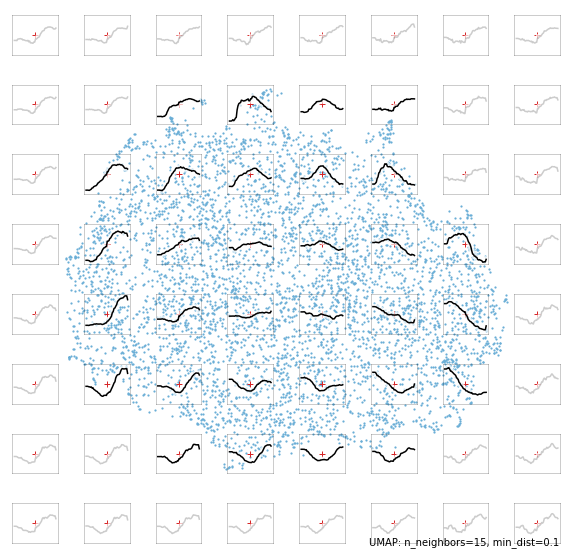

In [7]:
fig, ax = plt.subplots(1, figsize=(10,10))
show_inset_plot(markov_mapper, gridpoints, inside, inv_contours, inset_height=.7)

### Binom inset plot (averaged)

In [12]:
gridpoints, inside = grid_around_points(binom_mapper.embedding_, subdiv=8, margin=0.05)
inv_contours = average_inv_contours(binom_mapper.inverse_transform, gridpoints, num_samples=25, eps=0.3)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


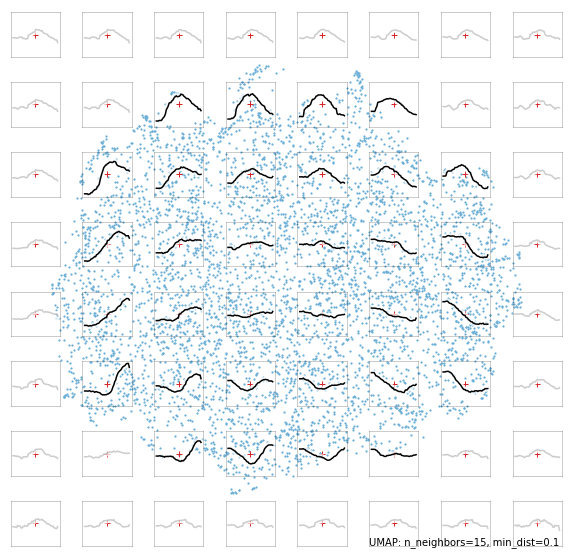

In [13]:
fig, ax = plt.subplots(1, figsize=(10,10))
show_inset_plot(binom_mapper, gridpoints, inside, inv_contours, inset_height=.7)

## Side plot

### Illustrate grid construction

In [ ]:
from scipy.spatial import ConvexHull
from matplotlib.path import Path
from itertools import product
from matplotlib.gridspec import GridSpec

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


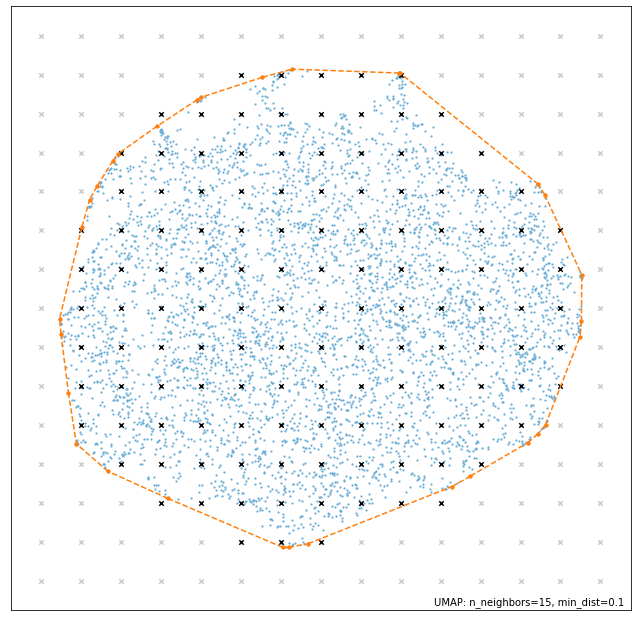

In [ ]:
umap.plot.points(mapper)

# parameters
margin = 0.05
subdivisions=15

# Compute complex hull
points = mapper.embedding_
hull = ConvexHull(points)
hull_path = Path(points[hull.vertices])

# Visualize complex hull
ax = plt.gca()
for simplex in hull.simplices:
    ax.plot(points[simplex, 0], points[simplex, 1], '.--C1')

# Grid in box around dataset
xmin, ymin = hull.min_bound
xmax, ymax = hull.max_bound
width = xmax - xmin
height = ymax - ymin
xmargin = margin * height
ymargin = margin * width
xgrid = np.linspace(xmin - xmargin, xmax + xmargin, subdivisions)
ygrid = np.linspace(ymin - ymargin, ymax + ymargin, subdivisions)
gridpoints = np.array(list(product(xgrid, ygrid)))

# Determine gridpoints inside/outside the convex hull
radius = margin * min(height, width)
inside = hull_path.contains_points(gridpoints, radius=radius)
outside = inside == False

x, y = gridpoints.T
plt.scatter(x[inside], y[inside], marker='x', c='k', s=20)
plt.scatter(x[outside], y[outside], marker='x', c='0.8', s=20)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


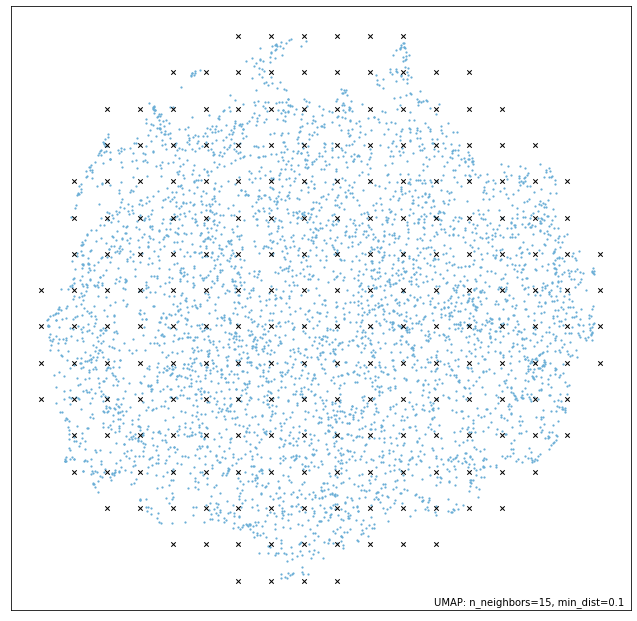

In [ ]:
# Now using grid_around_points function
umap.plot.points(mapper)
points = mapper.embedding_
gridpoints, inside = grid_around_points(points, subdiv=20)
x, y = gridpoints.T
plt.scatter(x[inside], y[inside], marker='x', c='k', s=20, lw=1)

### Side plot example

In [3]:
gridpoints, inside = grid_around_points(markov_mapper.embedding_, subdiv=10, margin=0.1)
inv_contours = markov_mapper.inverse_transform(gridpoints)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


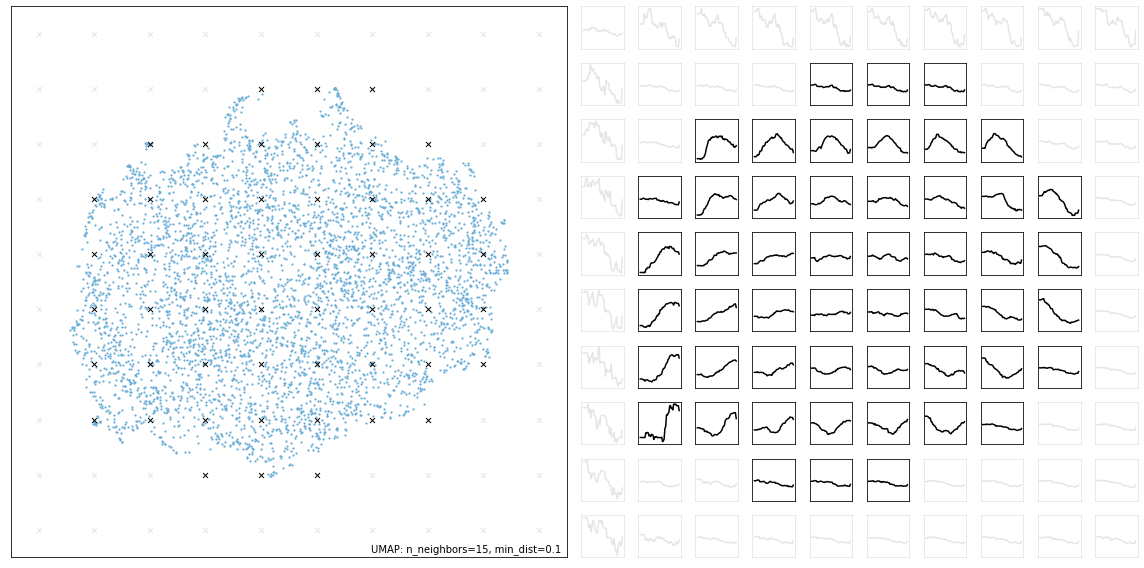

In [6]:
fig = plt.figure(figsize=(16, 8), tight_layout=True)
show_side_plot(markov_mapper, gridpoints, inside, inv_contours)

### Average contours

In [ ]:
subdiv = 8
gridpoints, inside = grid_around_points(markov_mapper.embedding_, subdiv=8, margin=0.05)
mean_inv_contours = average_inv_contours(markov_mapper.inverse_transform, gridpoints, num_samples=30)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


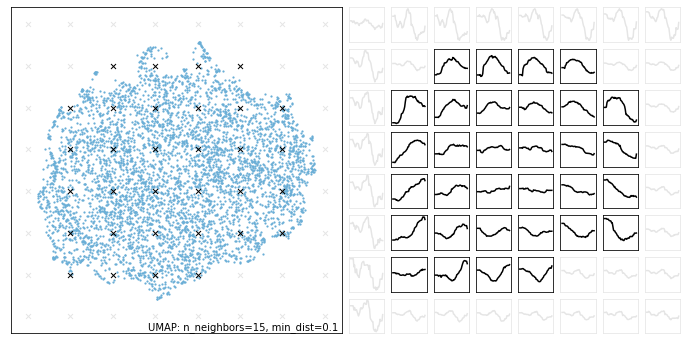

In [ ]:
fig = plt.figure(figsize=(12, 6))
show_side_plot(markov_mapper, gridpoints, inside, mean_inv_contours)